In [1]:
# Dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

#CLEAN THE AIRBNB DATA
AirBnB_df = pd.read_csv('Resources/AB_US_2020.csv')

#Add date column that states month-year to match city sales df headers
last_review = AirBnB_df.loc[:,'last_review']
AirBnB_df['last_review'] = AirBnB_df['last_review'].fillna('00/00/00')

new_dates_list = []
for date in last_review:
    if int(date[:2]) > 12:
        split_date = date.split('/')
        new_date = f'20{split_date[2]}-{split_date[1]}'
        new_dates_list.append(new_date)
        
    elif int(date[:2]) <= 12:
        split_date = date.split('/')
        new_date = f'20{split_date[2]}-{split_date[0]}'
        new_dates_list.append(new_date)

AirBnB_df['Month/Year'] = new_dates_list


#Change New York City to New York
AirBnB_df = AirBnB_df.replace("New York City","New York")

#Change NaN for review_per_month to 0
AirBnB_df['reviews_per_month'] = AirBnB_df['reviews_per_month'].fillna(0)


# SALES CITY DATA
#Pull in Sales City data
sales_city_df = pd.read_csv('Resources/House_Sales_City.csv')

#Group Sales City Data and check duplicate cities (will have counts > 1)
grouped_df = sales_city_df.groupby('RegionName').count()

#Pull rows where values = 1 to get non-duplicate cities
sales_city_list = grouped_df[grouped_df['RegionID']==1].index

#Unique cities in the AirBnB data
thelist = AirBnB_df['city'].unique()

#Pull sales city data from cities in AirBnB data
clean_city_df = sales_city_df[sales_city_df['RegionName'].isin(sales_city_list)]
clean_city_df = clean_city_df[clean_city_df['RegionName'].isin(thelist)]

#Merge both data sets
merged_data = AirBnB_df.merge(clean_city_df, right_on = 'RegionName', left_on = 'city')

C:\Users\whois\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Josh's Part

In [2]:
# got a list of every column using = [print(f'"{item}",') for item in merged_data.columns]/ got every column for a date
cols_i_want = ["2008-03","2008-04",
"2008-05",
"2008-06",
"2008-07",
"2008-08",
"2008-09",
"2008-10",
"2008-11",
"2008-12",
"2009-01",
"2009-02",
"2009-03",
"2009-04",
"2009-05",
"2009-06",
"2009-07",
"2009-08",
"2009-09",
"2009-10",
"2009-11",
"2009-12",
"2010-01",
"2010-02",
"2010-03",
"2010-04",
"2010-05",
"2010-06",
"2010-07",
"2010-08",
"2010-09",
"2010-10",
"2010-11",
"2010-12",
"2011-01",
"2011-02",
"2011-03",
"2011-04",
"2011-05",
"2011-06",
"2011-07",
"2011-08",
"2011-09",
"2011-10",
"2011-11",
"2011-12",
"2012-01",
"2012-02",
"2012-03",
"2012-04",
"2012-05",
"2012-06",
"2012-07",
"2012-08",
"2012-09",
"2012-10",
"2012-11",
"2012-12",
"2013-01",
"2013-02",
"2013-03",
"2013-04",
"2013-05",
"2013-06",
"2013-07",
"2013-08",
"2013-09",
"2013-10",
"2013-11",
"2013-12",
"2014-01",
"2014-02",
"2014-03",
"2014-04",
"2014-05",
"2014-06",
"2014-07",
"2014-08",
"2014-09",
"2014-10",
"2014-11",
"2014-12",
"2015-01",
"2015-02",
"2015-03",
"2015-04",
"2015-05",
"2015-06",
"2015-07",
"2015-08",
"2015-09",
"2015-10",
"2015-11",
"2015-12",
"2016-01",
"2016-02",
"2016-03",
"2016-04",
"2016-05",
"2016-06",
"2016-07",
"2016-08",
"2016-09",
"2016-10",
"2016-11",
"2016-12",
"2017-01",
"2017-02",
"2017-03",
"2017-04",
"2017-05",
"2017-06",
"2017-07",
"2017-08",
"2017-09",
"2017-10",
"2017-11",
"2017-12",
"2018-01",
"2018-02",
"2018-03",
"2018-04",
"2018-05",
"2018-06",
"2018-07",
"2018-08",
"2018-09",
"2018-10",
"2018-11",
"2018-12",
"2019-01",
"2019-02",
"2019-03",
"2019-04",
"2019-05",
"2019-06",
"2019-07",
"2019-08",
"2019-09",
"2019-10",
"2019-11",
"2019-12",
"2020-01",
"2020-02",
"2020-03"]

In [3]:
# break the type using bins into either privatley or company owned less than five is owned privatley
bins = [0,5,600]
type = ["Privatley Owned","Owned by a Company"]
merged_data["Type Property"] = pd.cut(merged_data["calculated_host_listings_count"], bins, labels=type)
#group the data by type
grouptype = merged_data.groupby("Type Property")
avgsale = grouptype[cols_i_want].mean()
avgsale
#made how many rows I am going to use smaller so it would properly fit on the graph
newavgsale=avgsale[avgsale.columns[119:144]]

In [8]:
# get the how long the list is of x values
x_value =list(newavgsale.columns.values)
lengthprices=len(x_value)
newavgsale

,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
Type Property,,,,,,,,,,,,,,,,,,,,,
Privatley Owned,578777.763286,584995.266752,585660.823620,586461.788960,584094.630039,582561.227214,586287.645700,592878.683440,597850.321951,600389.500385,...,610685.795122,613369.998460,618106.240822,622168.721951,620583.150706,614748.548395,620661.870090,624974.862131,630414.079589,637299.749422
Owned by a Company,587568.778415,593082.697324,595391.823806,596197.689498,596556.197362,595955.176269,599814.675412,604959.849445,609626.615488,611294.834911,...,626476.619214,628731.750764,633409.968696,637620.518745,636740.523217,631551.337855,635424.524857,639735.790415,649106.100470,660107.550123


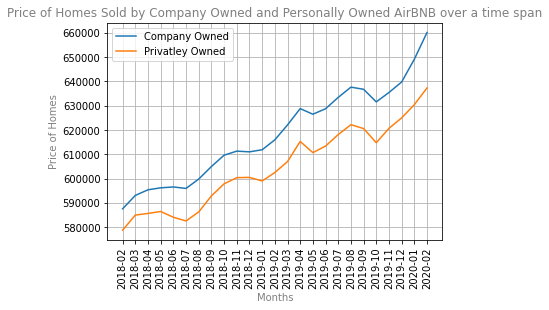

In [5]:
#getting the list values for my plotting
comowned=newavgsale.iloc[1,:]
privowned=newavgsale.iloc[0,:]
#plotting the graph
plt.xlabel("Months", color= "grey")
plt.title("Price of Homes Sold by Company Owned and Personally Owned AirBNB over a time span",color="grey")
plt.ylabel("Price of Homes", color= "grey")
plt.plot(comowned, label="Company Owned")
plt.plot(privowned, label= "Privatley Owned")
plt.xticks(range(0,lengthprices), rotation =90)
plt.grid()
plt.legend()
plt.show()

City,Privatley Owned,Company Owned,Total
Asheville,1691,383,2074
Boston,1675,1664,3339
Chicago,4584,1813,6397
Jersey City,1333,1155,2488
Los Angeles,23870,7666,31536
New Orleans,4496,1912,6408
New York,40823,4933,45756
Pacific Grove,120,59,179
San Diego,8937,3467,12404
San Francisco,4984,2069,7053


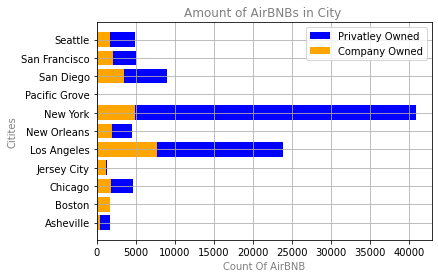

In [22]:
df = pd.DataFrame({"City":["Asheville","Boston","Chicago","Jersey City","Los Angeles","New Orleans","New York","Pacific Grove","San Diego","San Francisco","Seattle"],
                   "Privatley Owned":[1691,1675,4584,1333,23870,4496,40823,120,8937,4984,4862],
                  "Company Owned":[383,1664,1813,1155,7666,1912,4933,59,3467,2069,1713],
                 "Total":[2074,3339,6397,2488,31536,6408,45756,179,12404,7053,6575]})
#dfsorted = df.sort_values("Total",ascending=False)
dhbar= plt.barh(y= df["City"], width = df["Privatley Owned"], color = "blue",label="Privatley Owned")
dhbar= plt.barh(y= df["City"], width = df["Company Owned"], color = "orange",label="Company Owned")
plt.legend()
plt.xlabel("Count Of AirBNB", color= "grey")
plt.title("Amount of AirBNBs in City ",color="grey")
plt.ylabel("Citites", color= "grey")
plt.grid()
df1=df.style.hide_index()

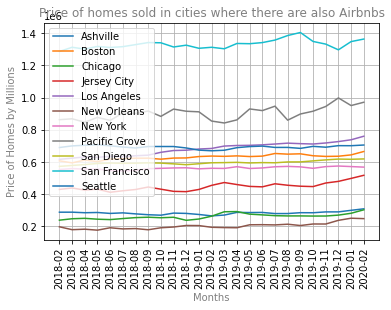

In [7]:
#grouped by city
pricecitygroup = merged_data.groupby("city")
#avg of prices in city
pricegrpcity=pricecitygroup[cols_i_want].mean()
pricegrpcity
newpricegrpcity = pricegrpcity[pricegrpcity.columns[119:144]]
newpricegrpcity
#each city list for the months
ashville = newpricegrpcity.iloc[0,:]
boston = newpricegrpcity.iloc[1,:]
chicago = newpricegrpcity.iloc[2,:]
jersey_city = newpricegrpcity.iloc[3,:]
los_angeles = newpricegrpcity.iloc[4,:]
new_orleans = newpricegrpcity.iloc[5,:]
new_york = newpricegrpcity.iloc[6,:]
pacific_grove = newpricegrpcity.iloc[7,:]
san_diego = newpricegrpcity.iloc[8,:]
san_francisco = newpricegrpcity.iloc[9,:]
seattle = newpricegrpcity.iloc[10,:]

plt.xlabel("Months", color= "grey")
plt.title("Price of homes sold in cities where there are also Airbnbs",color="grey")
plt.ylabel("Price of Homes by Millions", color= "grey")
plt.plot(ashville, label="Ashville")
plt.plot(boston, label="Boston")
plt.plot(chicago, label="Chicago")
plt.plot(jersey_city, label="Jersey City")
plt.plot(los_angeles, label="Los Angeles")
plt.plot(new_orleans, label="New Orleans")
plt.plot(new_york, label="New York")
plt.plot(pacific_grove, label="Pacific Grove")
plt.plot(san_diego, label="San Diego")
plt.plot(san_francisco, label="San Francisco")
plt.plot(seattle, label="Seattle")
plt.xticks(range(0,lengthprices), rotation =90)
plt.grid()
plt.legend(loc = "upper left")
plt.show()
#avgsale = grouptype[cols_i_want].mean()
#newpricegrpcity
#,(boston, label="Boston"))

In [24]:
newpricegrpcity

,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
city,,,,,,,,,,,,,,,,,,,,,
Asheville,288100.0,288200,284800,286300,280500,284000,277700,272400,269400,282500,...,285900.0,286600.0,279500.0,279700.0,285000.0,284700.0,289900.0,290100.0,299800.0,309000.0
Boston,607300.0,594900,612000,602500,618000,621000,623700,623900,617700,624500,...,634000.0,636600.0,653000.0,648900.0,651000.0,638900.0,634800.0,636000.0,644300.0,665400.0
Chicago,238500.0,247400,250000,244600,242100,248600,254400,256800,253600,256600,...,276000.0,271500.0,266500.0,264900.0,265000.0,264100.0,264300.0,270000.0,281400.0,302900.0
Jersey City,429700.0,438500,425500,431200,412000,421300,429100,444600,431100,417700,...,448400.0,445700.0,464700.0,455600.0,449600.0,447300.0,469500.0,479700.0,498200.0,517400.0
Los Angeles,616800.0,624000,631300,629100,635300,633600,638900,642700,660300,671400,...,703800.0,706800.0,711800.0,717300.0,714100.0,711900.0,718400.0,727100.0,738200.0,760200.0
New Orleans,197300.0,179400,182400,176400,191400,184200,186300,178900,191300,196000,...,209800.0,210500.0,209100.0,213400.0,205200.0,214800.0,214600.0,237500.0,250700.0,248100.0
New York,553200.0,559400,555700,556300,547000,544300,548100,558700,560700,563100,...,559800.0,563200.0,570500.0,572800.0,569900.0,560800.0,571500.0,575100.0,571700.0,568300.0
Pacific Grove,863100.0,868700,847400,877300,858500,904800,902000,917000,883700,929000,...,929900.0,919600.0,947100.0,860100.0,898400.0,915800.0,945200.0,998400.0,951000.0,971500.0
San Diego,573000.0,578500,584100,591000,593500,591900,592700,594800,593200,588600,...,594200.0,596300.0,595300.0,600500.0,600800.0,607000.0,613300.0,618300.0,617000.0,619200.0
